Introduction & Problem Definition

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

Download Data

In [2]:
# Load data from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

response = requests.get(url)
df = pd.read_csv(io.StringIO(response.text), names=column_names, na_values='?')

Exploratory Data Analysis (EDA)

Starting exploratory data analysis


In [3]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
86,47.0,1.0,3.0,138.0,257.0,0.0,2.0,156.0,0.0,0.0,1.0,0.0,3.0,0
182,42.0,1.0,1.0,148.0,244.0,0.0,2.0,178.0,0.0,0.8,1.0,2.0,3.0,0
278,57.0,1.0,2.0,154.0,232.0,0.0,2.0,164.0,0.0,0.0,1.0,1.0,3.0,1
21,58.0,0.0,1.0,150.0,283.0,1.0,2.0,162.0,0.0,1.0,1.0,0.0,3.0,0


In [4]:
#Check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

There are 4 missing values for ca which is the number of major vessels (0-3) colored by flourosopy And 2 for thalach
Missing Values Analysis:
Feature 'ca' (number of major vessels colored by fluoroscopy): 4 missing values (valid range: 0-3)
Feature 'thalach' (maximum heart rate achieved): 2 missing values

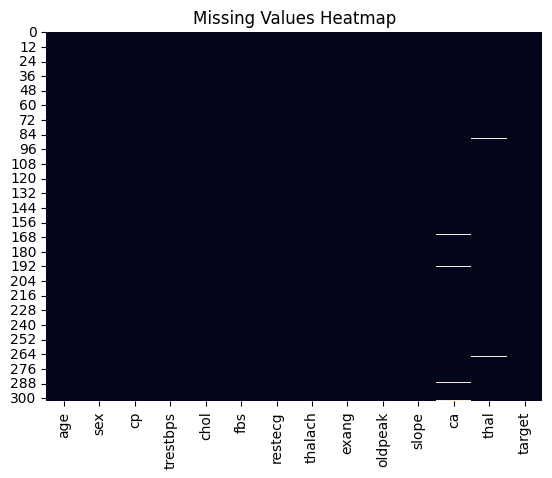

In [5]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

We see here that we are not missing too many values (only 4 in 'ca' and 2 in 'thalach') and can therefore safely remove the null values from our dataset without losing too much information.

In [6]:
#Fixing Null Values

#For the ca we know from the data set information that the number of major vessels (0-3) colored by flourosopy, so we can fill it with the mode
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])

#Same for thal
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

#After filling them with their mode, we can check if we still have any more null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

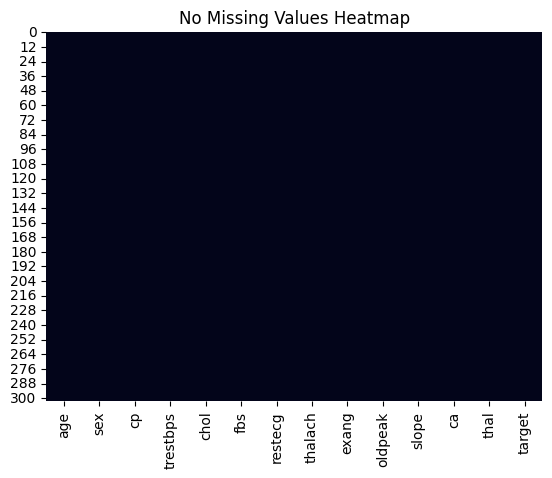

In [7]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('No Missing Values Heatmap')
plt.show()

In [8]:
#Fixing Null Values

#For the ca we know from the data set information that the number of major vessels (0-3) colored by flourosopy, so we can fill it with the mode
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])

#Same for thal
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

#After filling them with their mode, we can check if we still have any more null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

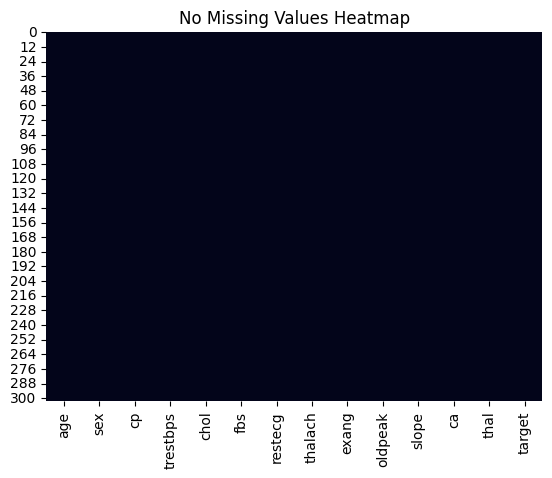

In [9]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('No Missing Values Heatmap')
plt.show()

In [10]:
#Looking for corrolation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.504092


In [11]:
#Collecting statistical data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


So we can treat it as a multiclass or binary classification

We can either use our target values 0-4 for multiclass, or convert it to binary where 0 = no disease and 1 = presence of disease (original values 1,2,3,4).


<Axes: >

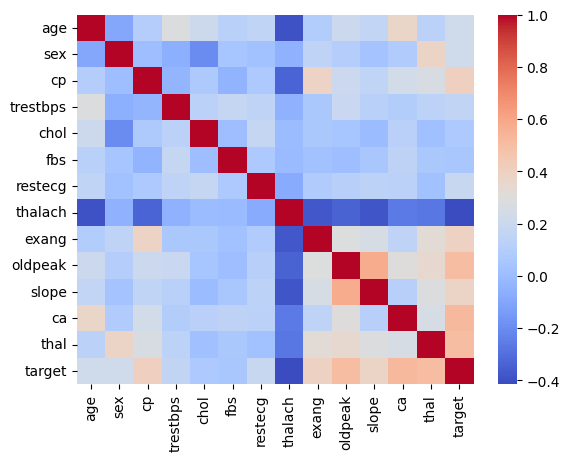

In [12]:
#Heat map of corrolated data
sns.heatmap(df.corr(), cmap= "coolwarm")

From Collecting statistical data, We see that our data set is filled with age range(29 - 77), and the target goes from 0 to 4

This visualization helps us see how different features in our dataset are related to each other. Darker red colors indicate stronger correlations between features, while lighter blue colors show weaker relationships.

Feature Engineering & Preprocessing

Target Distribution:


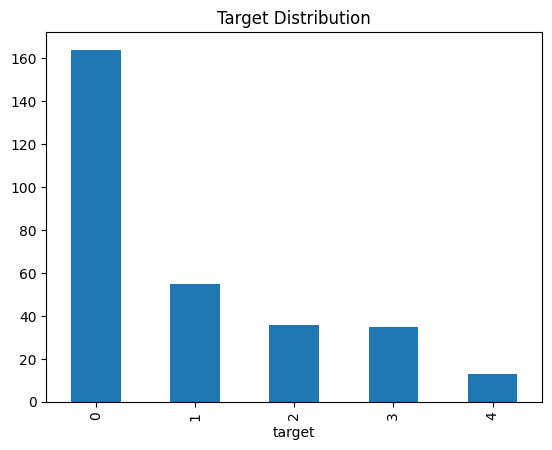


Binary Target Distribution:


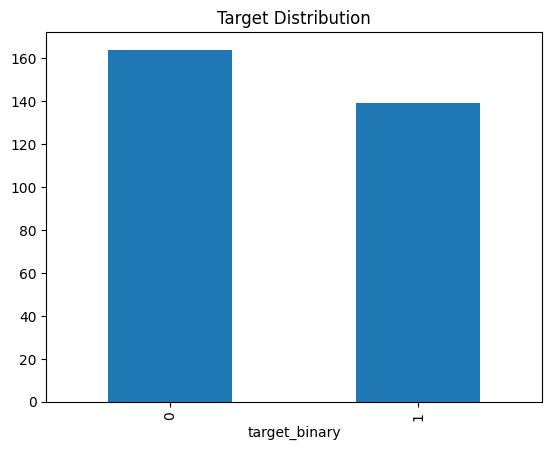


Binary Target Percentages:
target_binary
0    54.125413
1    45.874587
Name: proportion, dtype: float64


In [13]:
# Let's first look at the distribution of target values
print("Target Distribution:")
df['target'].value_counts().plot(kind='bar', title='Target Distribution')
plt.show()

# Convert to binary
df['target_binary'] = (df['target'] > 0).astype(int)
print("\nBinary Target Distribution:")
df['target_binary'].value_counts().plot(kind='bar', title='Target Distribution')
plt.show()

# Show percentages
print("\nBinary Target Percentages:")
print(df['target_binary'].value_counts(normalize=True) * 100)

There is a good amount of proportion with the two, we can attempt to create a two models that predict both binary or as multicalsss classification, the select which has higher metric scores

For preprocesing and model selection , test split, metrics and any other machine learning implemmentation, we can utilize sklearn library: https://scikit-learn.org/stable/


In [14]:
#Imports for sklearn and ML in python
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [15]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_binary
53,44.0,1.0,2.0,130.0,219.0,0.0,2.0,188.0,0.0,0.0,1.0,0.0,3.0,0,0
231,55.0,0.0,4.0,180.0,327.0,0.0,1.0,117.0,1.0,3.4,2.0,0.0,3.0,2,1
119,65.0,1.0,4.0,135.0,254.0,0.0,2.0,127.0,0.0,2.8,2.0,1.0,7.0,2,1
133,51.0,1.0,4.0,140.0,261.0,0.0,2.0,186.0,1.0,0.0,1.0,0.0,3.0,0,0
236,56.0,1.0,4.0,130.0,283.0,1.0,2.0,103.0,1.0,1.6,3.0,0.0,7.0,2,1
219,59.0,1.0,4.0,138.0,271.0,0.0,2.0,182.0,0.0,0.0,1.0,0.0,3.0,0,0
58,54.0,1.0,3.0,125.0,273.0,0.0,2.0,152.0,0.0,0.5,3.0,1.0,3.0,0,0
268,40.0,1.0,4.0,152.0,223.0,0.0,0.0,181.0,0.0,0.0,1.0,0.0,7.0,1,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3,1


In [16]:
X = df.drop(['target_binary', 'target'], axis=1)
y = df['target']

Splitting to avoid overfittingn {explain why we split to train, test, etc and why we stratify}

In [17]:
#Splitting Data
X_train, X_test, y_train_multiclass, y_test_multiclass = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_test, y_train_multiclass, y_test_multiclass

(      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
 97   60.0  0.0  4.0     150.0  258.0  0.0      2.0    157.0    0.0      2.6   
 82   39.0  1.0  3.0     140.0  321.0  0.0      2.0    182.0    0.0      0.0   
 167  54.0  0.0  2.0     132.0  288.0  1.0      2.0    159.0    1.0      0.0   
 288  56.0  1.0  2.0     130.0  221.0  0.0      2.0    163.0    0.0      0.0   
 71   67.0  1.0  4.0     125.0  254.0  1.0      0.0    163.0    0.0      0.2   
 ..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
 5    56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
 237  46.0  1.0  4.0     120.0  249.0  0.0      2.0    144.0    0.0      0.8   
 58   54.0  1.0  3.0     125.0  273.0  0.0      2.0    152.0    0.0      0.5   
 44   61.0  0.0  4.0     130.0  330.0  0.0      2.0    169.0    0.0      0.0   
 182  42.0  1.0  1.0     148.0  244.0  0.0      2.0    178.0    0.0      0.8   
 
      slope   ca  thal  
 97     2.0  

Model Selection & Training

In [18]:
#Testing with Logistic regression first
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


clf = LogisticRegression(random_state=42, max_iter=10000)


clf.fit(X_train, y_train_multiclass)
y_pred = clf.predict(X_test)
y_pred

logistic_conf_y_test = y_test_multiclass
logistic_conf_y_pred = y_pred



Training Process and Confusion Matrix

Confusion Matrix:
[[29  3  1  0  0]
 [ 6  4  1  0  0]
 [ 2  1  1  3  0]
 [ 0  1  2  3  1]
 [ 0  2  0  1  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.36      0.36      0.36        11
           2       0.20      0.14      0.17         7
           3       0.43      0.43      0.43         7
           4       0.00      0.00      0.00         3

    accuracy                           0.61        61
   macro avg       0.36      0.36      0.36        61
weighted avg       0.56      0.61      0.58        61



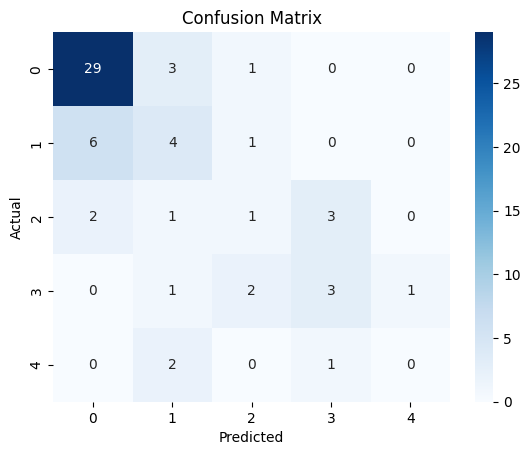

In [19]:
#Multiclass logistic evalation
print("Confusion Matrix:")
print(confusion_matrix(logistic_conf_y_test, logistic_conf_y_pred))

print()
print("Classification Report:")
print(classification_report(logistic_conf_y_test, logistic_conf_y_pred))
#heta map of
conf_matrix = confusion_matrix(logistic_conf_y_test, logistic_conf_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[27  6]
 [ 2 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



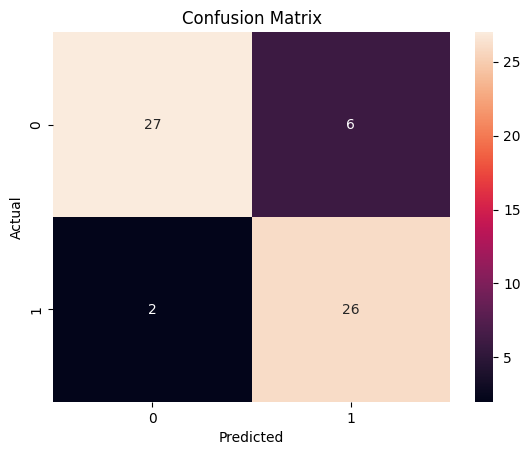

In [20]:
#Now with binary classification
y = df['target_binary']
#Splitting Data
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train_binary, y_test_binary
#Testing with Logistic regression first
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


clf = LogisticRegression(random_state=42, max_iter=10000)


clf.fit(X_train, y_train_binary)
y_pred_binary = clf.predict(X_test)
y_pred_binary

binary_logistic_conf_y_test = y_test_binary
binary_logistic_conf_y_pred = y_pred_binary

#Multiclass logistic evalation
print("Confusion Matrix:")
print(confusion_matrix(binary_logistic_conf_y_test, binary_logistic_conf_y_pred))

print()
print("Classification Report:")
print(classification_report(binary_logistic_conf_y_test, binary_logistic_conf_y_pred))
#heta map of
conf_matrix = confusion_matrix(binary_logistic_conf_y_test, binary_logistic_conf_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Testing different models


Results for Binary Classification:

Training with:  Logistic Regression
Accuracy for Logistic Regression model: 0.87
Cross-Validation: 0.83
Confusion Matrix:
[[27  6]
 [ 2 26]]

Training with:  Decision Tree
Accuracy for Decision Tree model: 0.72
Cross-Validation: 0.75
Confusion Matrix:
[[21 12]
 [ 5 23]]

Training with:  KNN


Accuracy for KNN model: 0.89
Cross-Validation: 0.82
Confusion Matrix:
[[26  7]
 [ 0 28]]

Training with:  SVM
Accuracy for SVM model: 0.85
Cross-Validation: 0.82
Confusion Matrix:
[[27  6]
 [ 3 25]]

Training with:  Random Forest
Accuracy for Random Forest model: 0.89
Cross-Validation: 0.78
Confusion Matrix:
[[27  6]
 [ 1 27]]

Training with:  Naive Bayes
Accuracy for Naive Bayes model: 0.87
Cross-Validation: 0.82
Confusion Matrix:
[[26  7]
 [ 1 27]]


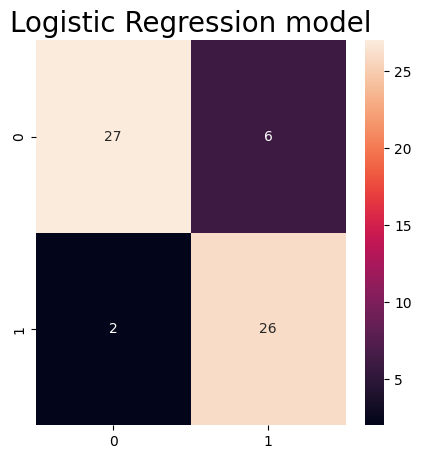

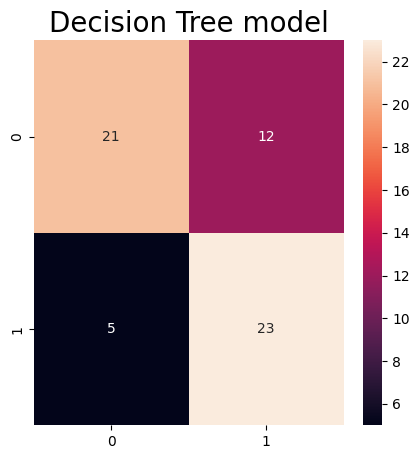

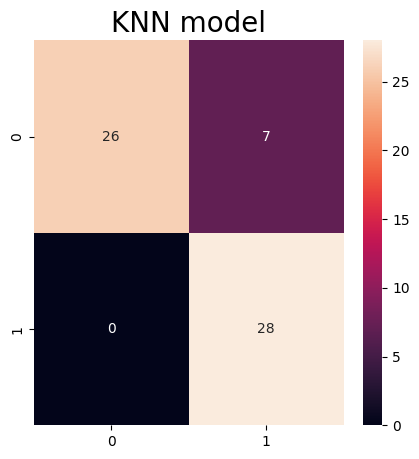

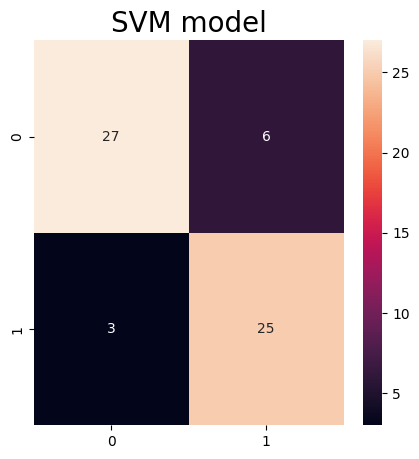

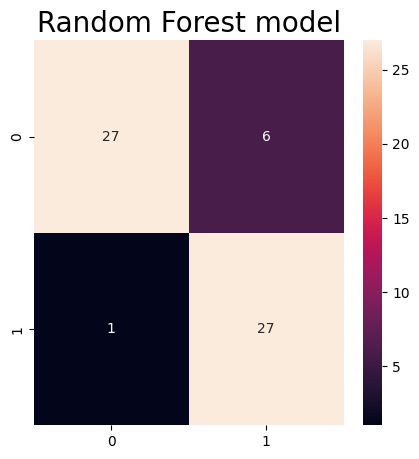

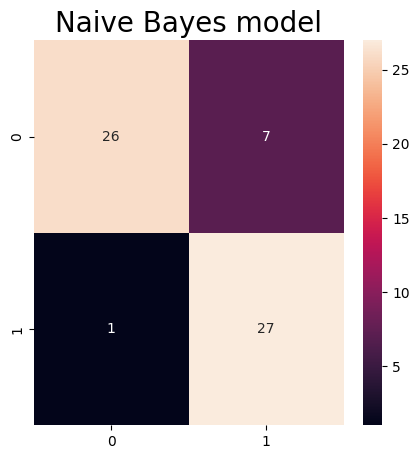

In [21]:
# Testing with our binary targets
binary_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
}

binary_results = {}

print("\nResults for Binary Classification:")

# Training and evaluatting each different model
for name, model in binary_models.items():
    print(f"\nTraining with:  {name}")
    model.fit(X_train, y_train_binary)
    y_pred = model.predict(X_test)
    # Calculate accuracy 
    accuracy = accuracy_score(y_test_binary, y_pred)
    #Calculate cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train_binary, cv=7)
    
    binary_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'classification_report': classification_report(y_test_binary, y_pred),
        'confusion_matrix': confusion_matrix(y_test_binary, y_pred)
    }
    
    # Display results
    title = f'{name} model'
    print(f"Accuracy for {name} model: {accuracy:.2f}")
    print(f"Cross-Validation: {cv_scores.mean():.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_binary, y_pred)}")
    f, ax = plt.subplots(figsize=(5, 5))
    ax.set_title(title, fontsize=20)
    sns.heatmap(confusion_matrix(y_test_binary, y_pred), annot=True)
    



Testing several models with multiclass targets


Results for Multiclass Classification:

Training Logistic Regression:
Accuracy: 0.52
Cross-Validation Mean: 0.50
Confusion Matrix:
[[30  1  1  1  0]
 [ 9  1  1  0  0]
 [ 5  1  1  0  0]
 [ 4  0  3  0  0]
 [ 3  0  0  0  0]]

Training Decision Tree:
Accuracy: 0.26
Cross-Validation Mean: 0.36
Confusion Matrix:
[[15  6  7  4  1]
 [ 3  1  4  2  1]
 [ 6  1  0  0  0]
 [ 4  2  0  0  1]
 [ 2  0  0  1  0]]

Training KNN:
Accuracy: 0.51
Cross-Validation Mean: 0.48
Confusion Matrix:
[[29  2  1  1  0]
 [ 8  2  1  0  0]
 [ 7  0  0  0  0]
 [ 4  1  2  0  0]
 [ 3  0  0  0  0]]

Training SVM:
Accuracy: 0.54
Cross-Validation Mean: 0.54
Confusion Matrix:
[[33  0  0  0  0]
 [11  0  0  0  0]
 [ 7  0  0  0  0]
 [ 7  0  0  0  0]
 [ 3  0  0  0  0]]

Training Random Forest:


Accuracy: 0.54
Cross-Validation Mean: 0.50
Confusion Matrix:
[[33  0  0  0  0]
 [10  0  1  0  0]
 [ 6  1  0  0  0]
 [ 5  0  2  0  0]
 [ 3  0  0  0  0]]

Training Naive Bayes:
Accuracy: 0.11
Cross-Validation Mean: 0.15
Confusion Matrix:
[[ 5  0  0  2 26]
 [ 3  0  0  0  8]
 [ 1  0  0  0  6]
 [ 1  0  1  0  5]
 [ 1  0  0  0  2]]


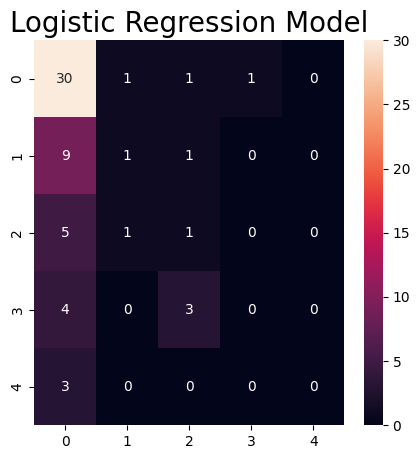

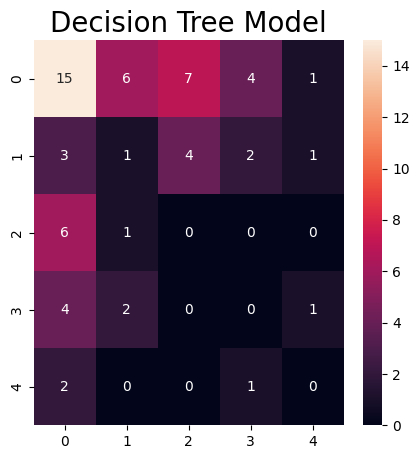

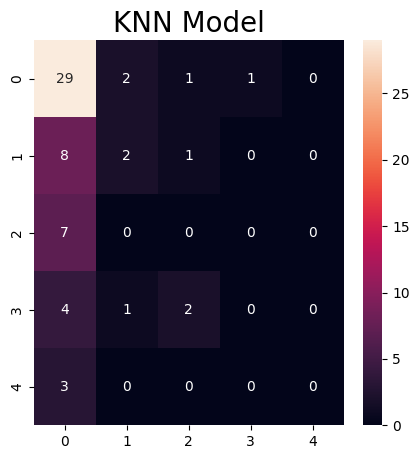

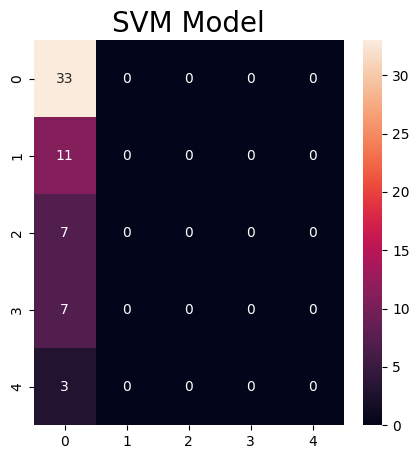

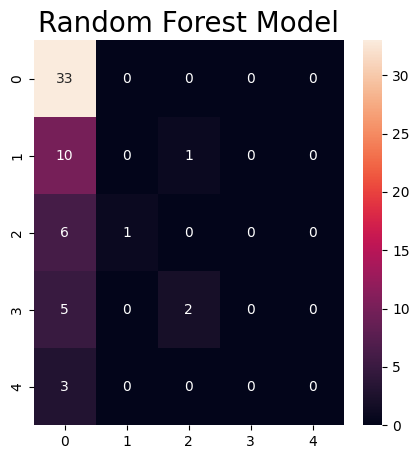

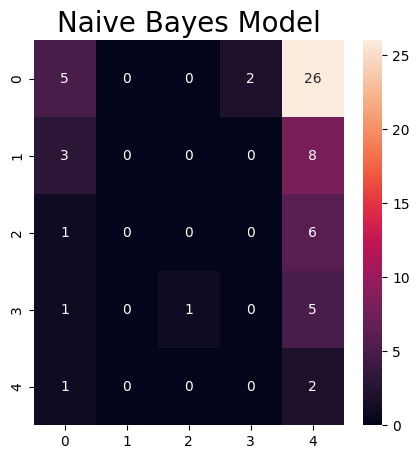

In [25]:
# Testing with our multiclass targets
multiclass_models = binary_models.copy()  # Same copy of models for multiclass
multiclass_results = {}

print("\nResults for Multiclass Classification:")

# Train and evaluate each model
for name, model in multiclass_models.items():
    print(f"\nTraining {name}:")
    model.fit(X_train, y_train_multiclass)
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and cross-validation scores
    accuracy = accuracy_score(y_test_multiclass, y_pred)
    cv_scores = cross_val_score(model, X_train, y_train_multiclass, cv=5)
    
    # Store results
    multiclass_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'classification_report': classification_report(y_test_multiclass, y_pred, zero_division=1),
        'confusion_matrix': confusion_matrix(y_test_multiclass, y_pred)
    }
    
    title = f"{name} Model"
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Cross-Validation Mean: {cv_scores.mean():.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_multiclass, y_pred)}")
    f, ax = plt.subplots(figsize=(5, 5))
    ax.set_title(title, fontsize=20)
    sns.heatmap(confusion_matrix(y_test_multiclass, y_pred), annot=True)
   
    


Selecting the best model

In [23]:
best_binary_model = max(binary_results.items(), key=lambda x: x[1]['accuracy'])
print(f"\nBest Binary Classification Model: {best_binary_model[0]},  Accuracy {best_binary_model[1]['accuracy']:.4f}")

# Find the best model for multiclass classification
best_multiclass_model = max(multiclass_results.items(), key=lambda x: x[1]['accuracy'])
print(f"Best Multiclass Classification Model: {best_multiclass_model[0]}, Accuracy {best_multiclass_model[1]['accuracy']:.4f}")


Best Binary Classification Model: KNN,  Accuracy 0.8852
Best Multiclass Classification Model: SVM, Accuracy 0.5410


Visualizing all Binary vs Multiclass

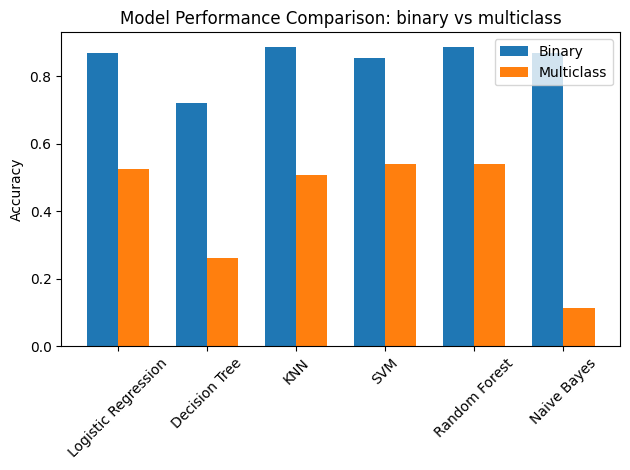

In [24]:
# Prepare data for plotting
models = list(binary_results.keys())
binary_acc = [result['accuracy'] for result in binary_results.values()]
multiclass_acc = [result['accuracy'] for result in multiclass_results.values()]
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, binary_acc, width, label='Binary')
plt.bar(x + width/2, multiclass_acc, width, label='Multiclass')
plt.xticks(x, models, rotation=45)
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison: binary vs multiclass')
plt.legend()
plt.tight_layout()
plt.show()

RESULTS

These are our results with Best Binary Classification Model: KNN achieving an accuracy of 88.52%, and Best Multiclass Classification Model: SVM with accuracy of 54.10%. After importing our dataset from UCI, we performed data cleaning and analysis, creating a binary version of our target for better prediction. Through preprocessing, train-test splitting, and cross-validation, we evaluated multiple models using various metrics. We utilized confusion matrices to visualize model performance and checked metrics like accuracy and cross-validation scores throughout. Our comparative analysis graphs showed KNN performing exceptionally well for binary classification. All these led to a robust model that effectively predicts heart disease presence, with binary classification proving more reliable than multiclass for practical screening applications.

Refrences.

- Cleveland Heart Disease dataset from UCI Machine Learning Repository: "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
- Contributors and maintainers of scikit-learn
- Cleveland Heart Disease Dataset: https://archive.ics.uci.edu/dataset/45/heart+disease, https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland,
-  Kaggle: https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland
-  Guide to Predictive models: https://www.pecan.ai/blog/predictive-modeling/#:~:text=The%20predictive%20modeling%20process%20has,prediction%20you%20want%20to%20create.
- Seaborn: https://seaborn.pydata.org/
- io: https://requests.readthedocs.io/en/latest/user/quickstart/
- Getting imports through URL: https://requests.readthedocs.io/en/latest/user/quickstart/
- Heatmap: https://seaborn.pydata.org/
- Target Distribution:https://stackoverflow.com/questions/63738389/pandas-sampling-from-a-dataframe-according-to-a-target-distribution, https://seaborn.pydata.org/tutorial/distributions.html
- SKLEARN: https://www.google.com/search?q=skelarn&rlz=1C1SJWC_enUS1057US1058&oq=skelarn&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIHCAEQABiABDIMCAIQABgKGLEDGIAEMgcIAxAAGIAEMgwIBBAAGAoYsQMYgAQyBwgFEAAYgAQyDAgGEAAYChixAxiABDIMCAcQABgKGLEDGIAEMgcICBAAGIAEMg8ICRAuGAoYgwEYsQMYgATSAQc5MjNqMWo3qAIAsAIA&sourceid=chrome&ie=UTF-8
- Train test splitting: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html
- Confusion Matrix: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/#
